**8Ïû• ‚Äì Ï∞®Ïõê Ï∂ïÏÜå**

_Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÎäî 8Ïû•Ïùò Î™®Îì† ÏÉòÌîå ÏΩîÎìúÏôÄ Ïó∞Ïäµ Î¨∏Ï†úÏóê ÎåÄÌïú ÏÜîÎ£®ÏÖòÏù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/08_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# 8.0 ÏÑ§Ï†ï

Ïù¥ ÌîÑÎ°úÏ†ùÌä∏ÏóêÎäî Python 3.7 Ïù¥ÏÉÅÏù¥ ÌïÑÏöîÌï©ÎãàÎã§:

In [39]:
import sys

assert sys.version_info >= (3, 7)

ÎòêÌïú Scikit-Learn ‚â• 1.0.1Ïù¥ ÌïÑÏöîÌï©ÎãàÎã§:

In [40]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Ïù¥Ï†Ñ Ïû•ÏóêÏÑúÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Í∏∞Î≥∏ Í∏ÄÍº¥ ÌÅ¨Í∏∞Î•º Ï†ïÏùòÌïòÏó¨ Í∑∏Î¶ºÏùÑ Îçî ÏòàÏÅòÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [41]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

import sys
# ÏΩîÎû©Ïùò Í≤ΩÏö∞ ÎÇòÎàî Ìè∞Ìä∏Î•º ÏÑ§ÏπòÌï©ÎãàÎã§.
if 'google.colab' in sys.modules:
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

# ÎÇòÎàî Ìè∞Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
import matplotlib

matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

Í∑∏Î¶¨Í≥† `images/dim_reduction` Ìè¥ÎçîÎ•º ÎßåÎì§Í≥†(ÏïÑÏßÅ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞), Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùÑ ÌÜµÌï¥ Ï±ÖÏóê ÏÇ¨Ïö©Ìï† Í∑∏Î¶ºÏùÑ Í≥†Ìï¥ÏÉÅÎèÑÎ°ú Ï†ÄÏû•ÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî `save_fig()` Ìï®ÏàòÎ•º Ï†ïÏùòÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [42]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 8.3 PCA

Ïù¥ Ïû•ÏóêÏÑúÎäî PCAÏôÄ Îß§ÎãàÌè¥Îìú ÌïôÏäµÏùò Í∞úÎÖêÏùÑ ÏÑ§Î™ÖÌïòÍ∏∞ ÏúÑÌï¥ Î™á Í∞ÄÏßÄ Í∑∏Î¶ºÏúºÎ°ú ÏãúÏûëÌï©ÎãàÎã§. ÏïÑÎûòÎäî Ïù¥Îü¨Ìïú Í∑∏Î¶ºÏùÑ ÏÉùÏÑ±ÌïòÎäî ÏΩîÎìúÏûÖÎãàÎã§. ÏõêÌïòÎäî Í≤ΩÏö∞ ÏïÑÎûòÏùò [Ï£ºÏÑ±Î∂Ñ](#Principal-Components) ÏÑπÏÖòÏúºÎ°ú Î∞îÎ°ú Í±¥ÎÑàÎõ∏ Ïàò ÏûàÏäµÎãàÎã§.

ÏûëÏùÄ 3D Îç∞Ïù¥ÌÑ∞ ÏßëÌï©ÏùÑ ÏÉùÏÑ±Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§. ÌÉÄÏõêÌòïÏù¥Í≥† 3D Í≥µÍ∞ÑÏóêÏÑú ÌöåÏ†ÑÌïòÎ©∞ Ï†êÎì§Ïù¥ Í≥†Î•¥ÏßÄ ÏïäÍ≤å Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÍ≥† ÎÖ∏Ïù¥Ï¶àÍ∞Ä ÏÉÅÎãπÌûà ÎßéÏùÄ Îç∞Ïù¥ÌÑ∞ÏûÖÎãàÎã§:

In [43]:
# Ï∂îÍ∞Ä ÏΩîÎìú

import numpy as np
from scipy.spatial.transform import Rotation

m = 60
X = np.zeros((m, 3))  # 3D Îç∞Ïù¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # Í≥†Î•¥ÏßÄ ÏïäÏùÄ Î∂ÑÌè¨
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # ÌÉÄÏõêÌòï
X += 0.28 * np.random.randn(m, 3)  # ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # ÏïΩÍ∞Ñ Ïù¥Îèô

Ìà¨ÏòÅ ÌèâÎ©¥Í≥º Ìï®Íªò 3D Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∑∏Î¶ΩÎãàÎã§.

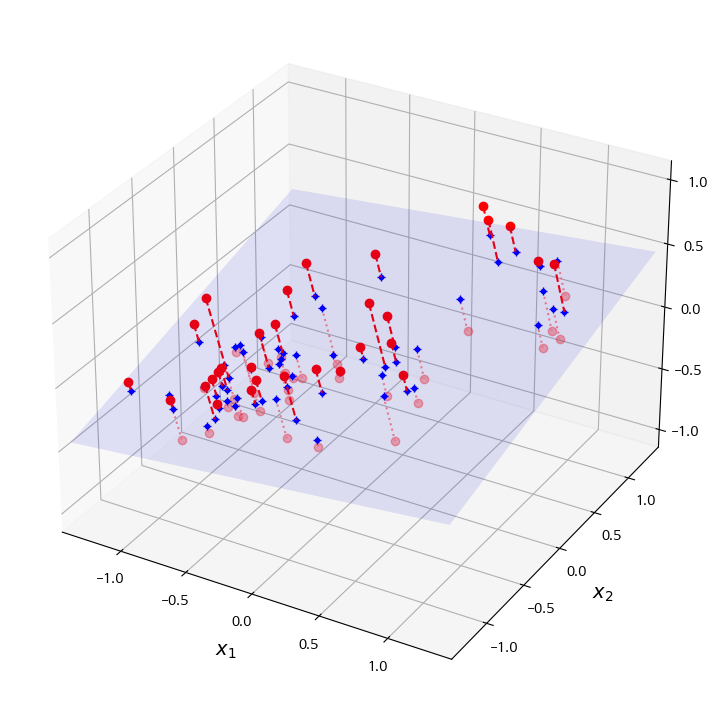

In [44]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-2Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # 2DÎ°ú Ï∂ïÏÜåÎêú Îç∞Ïù¥ÌÑ∞ÏÖã
X3D_inv = pca.inverse_transform(X2D)  # Ìà¨ÏòÅÎêú ÏÉòÌîåÏùò 3D ÏúÑÏπò
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # Ìà¨ÏòÅ ÌèâÎ©¥Ïùò Í≥ÑÏàò
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # ÌèâÎ©¥
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # ÌèâÎ©¥ ÏúÑÏùò ÏÉòÌîå
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # ÌèâÎ©¥ ÏïÑÎûò ÏÉòÌîå

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# ÌèâÎ©¥ ÏïÑÎûòÏóê ÏÉòÌîåÍ≥º Ìà¨ÏòÅÏÑ†ÏùÑ Î®ºÏ†Ä Í∑∏Î¶ΩÎãàÎã§.
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # Ìà¨ÏòÅ ÌèâÎ©¥
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # Ìà¨ÏòÅ ÏÉòÌîå
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# Ïù¥Ï†ú ÌèâÎ©¥ ÏúÑ ÏÉòÌîåÍ≥º Ìà¨ÏòÅÏÑ†ÏùÑ Í∑∏Î¶ΩÎãàÎã§.
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

save_fig("dataset_3d_plot", tight_layout=False)
plt.show()

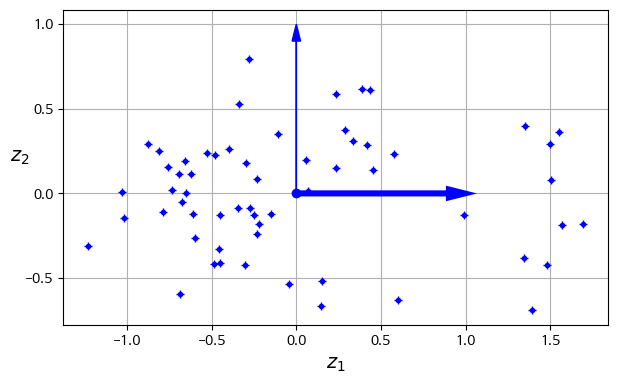

In [45]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-3ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
save_fig("dataset_2d_plot")

In [46]:
from sklearn.datasets import make_swiss_roll

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

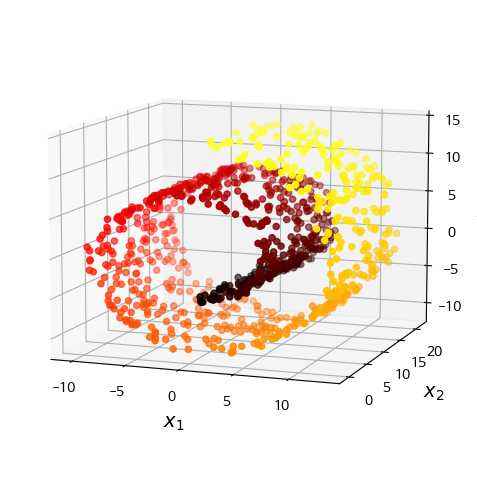

In [47]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-4Î•º ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

from matplotlib.colors import ListedColormap

darker_hot = ListedColormap(plt.cm.hot(np.linspace(0, 0.8, 256)))

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=t, cmap=darker_hot)
ax.view_init(10, -70)
set_xyz_axes(ax, axes)
save_fig("swiss_roll_plot")
plt.show()

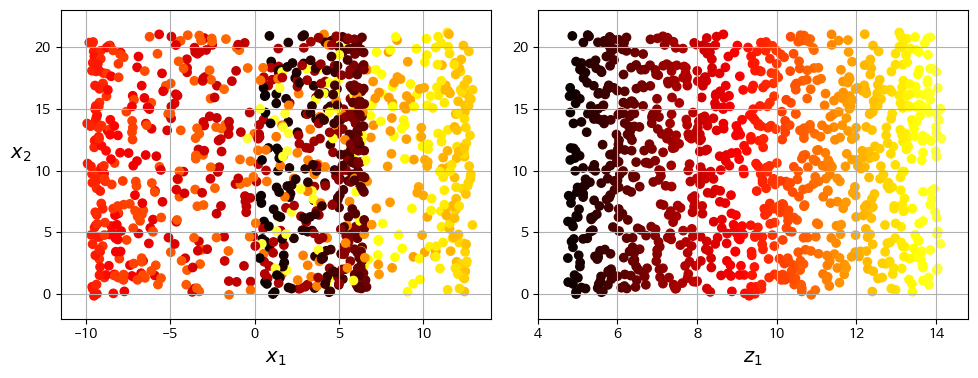

In [48]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-5Ïóê ÎåÄÌïú ÌîåÎ°ØÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.scatter(X_swiss[:, 0], X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", labelpad=10, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X_swiss[:, 1], c=t, cmap=darker_hot)
plt.axis([4, 14.8, axes[2], axes[3]])
plt.xlabel("$z_1$")
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

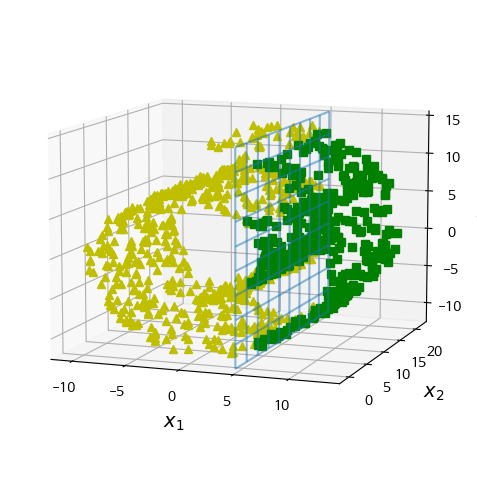

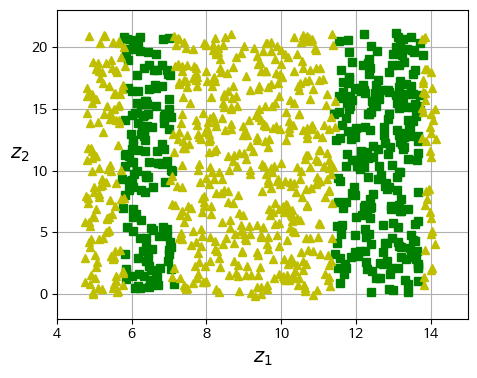

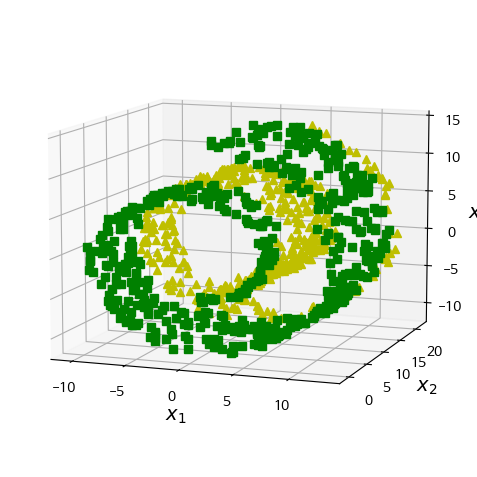

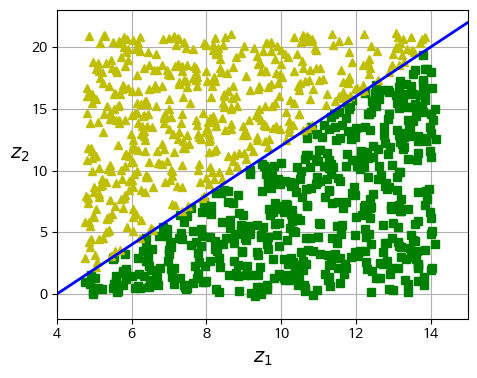

In [49]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-6Ïóê ÎåÄÌïú ÌîåÎ°ØÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

axes = [-11.5, 14, -2, 23, -12, 15]
x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

positive_class = X_swiss[:, 0] > 5
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
set_xyz_axes(ax, axes)
save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
save_fig("manifold_decision_boundary_plot2")
plt.show()

positive_class = 2 * (t[:] - 4) > X_swiss[:, 1]
X_pos = X_swiss[positive_class]
X_neg = X_swiss[~positive_class]

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
ax.set_xlabel("$x_1$", rotation=0)
ax.set_ylabel("$x_2$", rotation=0)
ax.set_zlabel("$x_3$", rotation=0)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)
ax.plot(t[positive_class], X_swiss[positive_class, 1], "gs")
ax.plot(t[~positive_class], X_swiss[~positive_class, 1], "y^")
ax.plot([4, 15], [0, 22], "b-", linewidth=2)
ax.axis([4, 15, axes[2], axes[3]])
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0, labelpad=8)
ax.grid(True)
save_fig("manifold_decision_boundary_plot4")
plt.show()

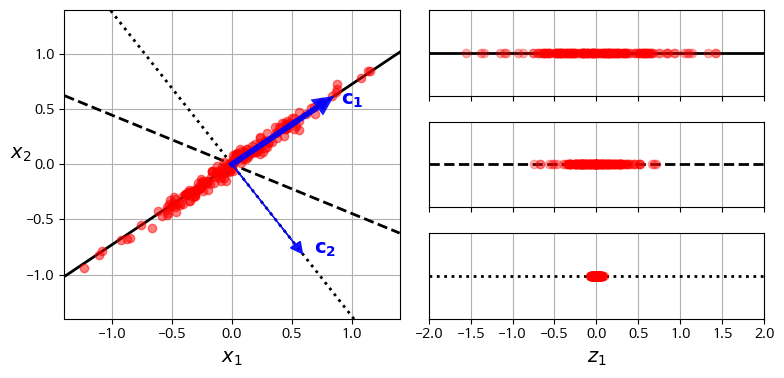

In [50]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-7ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X_line = np.random.randn(m, 2) / 10
X_line = X_line @ np.array([[stretch, 0], [0, 1]])  # Ïä§Ìä∏Î†àÏπò
X_line = X_line @ [[np.cos(angle), np.sin(angle)],
                   [np.sin(angle), np.cos(angle)]]  # ÌöåÏ†Ñ

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi / 6), np.sin(angle - 2 * np.pi / 6)])
u3 = np.array([np.cos(angle - np.pi / 2), np.sin(angle - np.pi / 2)])

X_proj1 = X_line @ u1.reshape(-1, 1)
X_proj2 = X_line @ u2.reshape(-1, 1)
X_proj3 = X_line @ u3.reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.subplot2grid((3, 2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4 * u1[1] / u1[0], 1.4 * u1[1] / u1[0]], "k-",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u2[1] / u2[0], 1.4 * u2[1] / u2[0]], "k--",
         linewidth=2)
plt.plot([-1.4, 1.4], [-1.4 * u3[1] / u3[0], 1.4 * u3[1] / u3[0]], "k:",
         linewidth=2)
plt.plot(X_line[:, 0], X_line[:, 1], "ro", alpha=0.5)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=4, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=1, alpha=0.9,
          length_includes_head=True, head_length=0.1, fc="b", ec="b", zorder=10)
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", color="blue")
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", color="blue")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.grid()

plt.subplot2grid((3, 2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=2)
plt.plot(X_proj1[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=2)
plt.plot(X_proj2[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid()

plt.subplot2grid((3, 2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "ro", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$")
plt.grid()

save_fig("pca_best_projection_plot")
plt.show()

## 8.3.2 Principal Components

In [55]:
# Ïä¨ÎùºÏù¥Îìú 51
import numpy as np

 # Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùò ÏïûÎ∂ÄÎ∂ÑÏóêÏÑú ÏÉùÏÑ±Ìïú ÏûëÏùÄ 3D Îç∞Ïù¥ÌÑ∞ÏÖã
m = 60
X = np.zeros((m, 3))  # 3D Îç∞Ïù¥ÌÑ∞ Ï¥àÍ∏∞Ìôî
np.random.seed(42)
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  # Í≥†Î•¥ÏßÄ ÏïäÏùÄ Î∂ÑÌè¨
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5  # ÌÉÄÏõêÌòï
X += 0.28 * np.random.randn(m, 3)  # ÎÖ∏Ïù¥Ï¶à Ï∂îÍ∞Ä
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
X += [0.2, 0, 0.2]  # ÏïΩÍ∞Ñ Ïù¥Îèô

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

In [57]:
c1

array([0.67857588, 0.70073508, 0.22023881])

In [58]:
c2

array([-0.72817329,  0.6811147 ,  0.07646185])

Ï∞∏Í≥†: ÏõêÏπôÏ†ÅÏúºÎ°ú SVD Ïù∏Ïàò Î∂ÑÌï¥ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ **X** = **UŒ£V**<sup>‚ä∫</sup>Ïù∏ ÏÑ∏ Í∞úÏùò ÌñâÎ†¨ **U**, **Œ£**, **V**ÏùÑ Î∞òÌôòÌï©ÎãàÎã§. **U**Îäî _m_ √ó _m_ ÌñâÎ†¨, **Œ£**Îäî _m_ √ó _n_ ÌñâÎ†¨, **V**Îäî _n_ √ó _n_ ÌñâÎ†¨ÏûÖÎãàÎã§. Í∑∏Îü¨ÎÇò `svd()` Ìï®ÏàòÎäî ÎåÄÏã† **U**, **s** Î∞è **V**<sup>‚ä∫</sup>Î•º Î∞òÌôòÌï©ÎãàÎã§. **s**Îäî **Œ£**Ïùò ÏÉÅÏúÑ _n_ ÌñâÏùò Ï£º ÎåÄÍ∞ÅÏÑ†Ïóê ÏûàÎäî Î™®Îì† Í∞íÏùÑ Ìè¨Ìï®ÌïòÎäî Î≤°ÌÑ∞ÏûÖÎãàÎã§. Îã§Î•∏ Í≥≥ÏóêÏÑúÎäî **Œ£**Í∞Ä 0ÏúºÎ°ú Í∞ÄÎìù Ï∞® ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê **s**Î°úÎ∂ÄÌÑ∞ Îã§ÏùåÍ≥º Í∞ôÏù¥ ÏâΩÍ≤å Ïû¨Íµ¨ÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§:

In [59]:
# Ï∂îÍ∞Ä ÏΩîÎìú - sÏóêÏÑú Œ£Î•º Íµ¨ÏÑ±ÌïòÎäî Î∞©Î≤ïÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§.
m, n = X.shape
Œ£ = np.zeros_like(X_centered)
Œ£[:n, :n] = np.diag(s)
assert np.allclose(X_centered, U @ Œ£ @ Vt)

## 8.3.3 d Ï∞®ÏõêÏúºÎ°ú Ìà¨ÏòÅÌïòÍ∏∞

In [60]:
# W2
W2 = Vt[:2].T
X2D =  X_centered @ W2

## 8.3.4 ÏÇ¨Ïù¥ÌÇ∑Îü∞ ÏÇ¨Ïö©ÌïòÍ∏∞

ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ PCAÎäî Ï†ïÎßê Í∞ÑÎã®Ìï©ÎãàÎã§. Ï§ëÏã¨ÏùÑ ÌèâÍ∑†Ïóê ÎßûÏ∂îÎäî Í≤ÉÍπåÏßÄ ÏûêÎèôÏúºÎ°ú Ï≤òÎ¶¨Ìï©ÎãàÎã§:

In [64]:
# PCA ...slide 53
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [65]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

## 8.3.5 ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞Ïùò ÎπÑÏú®

Ïù¥Ï†ú ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÎπÑÏú®ÏùÑ ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§:

In [66]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÏùÄ Î∂ÑÏÇ∞Ïùò ÏïΩ 76%Î•º ÏÑ§Î™ÖÌïòÎäî Î∞òÎ©¥, Îëê Î≤àÏß∏ Ï∞®ÏõêÏùÄ ÏïΩ 15%Î•º ÏÑ§Î™ÖÌï©ÎãàÎã§.

2DÎ°ú Ìà¨ÏòÅÌï®ÏúºÎ°úÏç® ÏïΩ 9%Ïùò Î∂ÑÏÇ∞Ïù¥ Í∞êÏÜåÌñàÏäµÎãàÎã§:

In [67]:
1 - pca.explained_variance_ratio_.sum()  # Ï∂îÍ∞Ä ÏΩîÎìú

0.09028309326742034

## 8.3.6 Ï†ÅÏ†àÌïú Ï∞®Ïõê Ïàò ÏÑ†ÌÉùÌïòÍ∏∞

In [68]:
from sklearn.datasets import fetch_openml

# ÏÇ¨Ïù¥ÌÇ∑Îü∞ 1.4Î≤ÑÏ†ÑÏóêÏÑú parser Îß§Í∞úÎ≥ÄÏàò Í∏∞Î≥∏Í∞íÏù¥ 'liac-arff'ÏóêÏÑú 'auto'Î°ú Î∞îÎÄåÏóàÏäµÎãàÎã§.
# Ïù¥Ï†Ñ Î≤ÑÏ†ÑÏóêÏÑúÎèÑ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÎÇ¥ÎèÑÎ°ù Î™ÖÏãúÏ†ÅÏúºÎ°ú 'auto'Î°ú ÏßÄÏ†ïÌï©ÎãàÎã§.

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, y_train = mnist.data[:60_000], mnist. target[:60_000]
X_test, y_test=mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum >= 0.95) + 1 # d == 154


In [69]:
d

154

In [70]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [71]:
pca.n_components_

154

In [72]:
pca.explained_variance_ratio_.sum()  # Ï∂îÍ∞Ä ÏΩîÎìú

0.9501960192613033

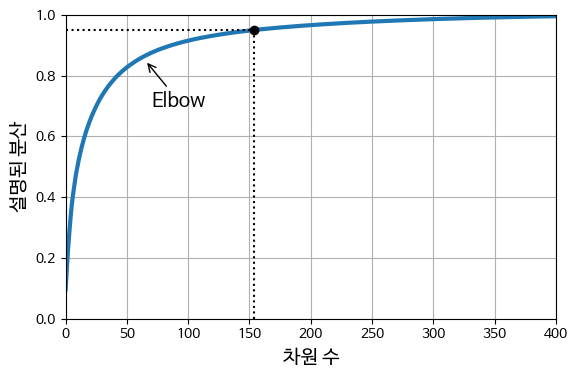

In [73]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-8ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Ï∞®Ïõê Ïàò")
plt.ylabel("ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"))
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [78]:
# Ïä¨ÎùºÏù¥Îìú 58
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(
    PCA(random_state = 42),
    RandomForestClassifier(random_state = 42)
)

param_distrib ={
    "pca__n_components": np.arange(10, 80),
    "randomforestclassifier__n_estimators": np.arange(50, 500)
}

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10,
                                cv = 3, random_state =42)
rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [79]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 475, 'pca__n_components': 57}


In [80]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

clf = make_pipeline(PCA(random_state=42), SGDClassifier())
param_grid = {"pca__n_components": np.arange(10, 80)}
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:1000], y_train[:1000])

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('sgdclassifier', SGDClassifier())]),
             param_grid={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79])})

In [81]:
grid_search.best_params_

{'pca__n_components': 60}

## 8.3.7 ÏïïÏ∂ïÏùÑ ÏúÑÌïú PCA

In [82]:
pca = PCA(0.95)
X_reduced = pca.fit_transform(X_train, y_train)

In [83]:
X_recovered = pca.inverse_transform(X_reduced)

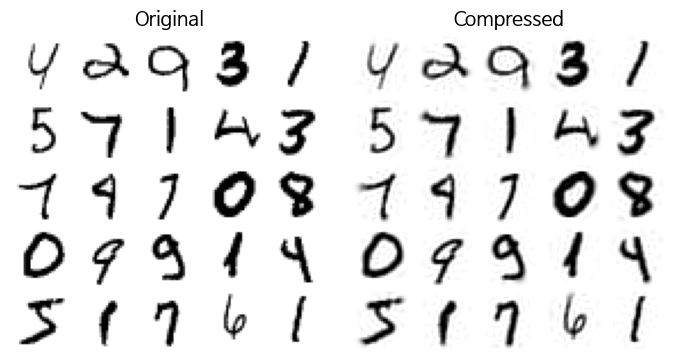

In [84]:
# extra code ‚Äì this cell generates and saves Figure 8‚Äì9

plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig("mnist_compression_plot")

## 8.3.8 ÎûúÎç§ PCA

In [89]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## 8.3.9 Ï†êÏßÑÏ†Å PCA

In [90]:
# IncrementalPCA ... slide62
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

**ÎÑòÌååÏù¥ `memmap` ÌÅ¥ÎûòÏä§ ÏÇ¨Ïö© ‚Äì ÎîîÏä§ÌÅ¨Ïùò Ïù¥ÏßÑ ÌååÏùºÏóê Ï†ÄÏû•Îêú Î∞∞Ïó¥Ïóê Î©îÎ™®Î¶¨ Îß§ÌïëÌïòÍ∏∞**

`memmap` Ïù∏Ïä§ÌÑ¥Ïä§Î•º ÏÉùÏÑ±ÌïòÍ≥†, MNIST ÌõàÎ†® ÏÑ∏Ìä∏Î•º Î≥µÏÇ¨Ìïú Îã§Ïùå, `flush()`Î•º Ìò∏Ï∂úÌïòÏó¨ Ï∫êÏãúÏóê ÎÇ®ÏïÑ ÏûàÎäî Î™®Îì† Îç∞Ïù¥ÌÑ∞Î•º ÎîîÏä§ÌÅ¨Ïóê Ï†ÄÏû•Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§. Ïù¥ ÏûëÏóÖÏùÄ ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ï≤´ Î≤àÏß∏ ÌîÑÎ°úÍ∑∏Îû®ÏóêÏÑú ÏàòÌñâÌï©ÎãàÎã§:

In [96]:
filename = "my_mnist.mmap"
X_mmap = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train # ÎåÄÏã† Î£®ÌîÑÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞Î•º Ï≤≠ÌÅ¨ Îã®ÏúÑÎ°ú Ï†ÄÏû•Ìï† Ïàò ÏûàÏäµÎãàÎã§.
X_mmap.flush()


Í∑∏Îü∞ Îã§Ïùå Îã§Î•∏ ÌîÑÎ°úÍ∑∏Îû®Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÏó¨ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï©ÎãàÎã§:

In [95]:
X_mmap = np.memmap(filename, dtype="float32", mode="readonly").reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components = 154, batch_size = batch_size)
inc_pca.fit(X_mmap)

IncrementalPCA(batch_size=600, n_components=154)

# 8.4 ÎûúÎç§ Ìà¨ÏòÅ

**Í≤ΩÍ≥†**: Ïù¥ ÏÑπÏÖòÏóêÏÑúÎäî ÏïΩ 2.5GBÏùò RAMÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. Ïª¥Ìì®ÌÑ∞ Î©îÎ™®Î¶¨Í∞Ä Î∂ÄÏ°±ÌïòÎ©¥ _m_Í≥º _n_ÏùÑ Ï§ÑÏù¥ÏÑ∏Ïöî:

In [110]:
# johnson_lindenstrauss_min_dim
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, Œµ = 1_000, 0.1

d= johnson_lindenstrauss_min_dim(m, eps= Œµ)
d

5920

In [111]:
# Ï∂îÍ∞Ä ÏΩîÎìú - johnson_lindenstrauss_min_dimÏúºÎ°ú Í≥ÑÏÇ∞Ìïú Î∞©Ï†ïÏãù
d = int(4 * np.log(m) / (Œµ ** 2 / 2 - Œµ ** 3 / 3))
d

5920

In [112]:
n = 10_000
np.random.seed(42)
P= np.random.randn(d, n) / np.sqrt(d) # ÌëúÏ§Ä Ìé∏Ï∞® = Î∂ÑÏÇ∞Ïùò Ï†úÍ≥±Í∑º

X = np.random.randn(m, n) # Í∞ÄÏßú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
X_reduced = X @ P.T

In [113]:
# GaussianRandomProjection
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps = Œµ, random_state=42)
X_reduced = gaussian_rnd_proj.fit_transform(X) # ÏúÑÏôÄ ÎèôÏùºÌïú Í≤∞Í≥º

components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T


**Í≤ΩÍ≥†**, Îã§Ïùå ÏÖÄÏùÑ Ïã§ÌñâÌïòÎäî Îç∞ Î™á Î∂Ñ Ï†ïÎèÑ Í±∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§:

In [114]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
X_recovered = X_reduced @ components_pinv.T

In [115]:
# Ï∂îÍ∞Ä ÏΩîÎìú ‚Äì GaussianÍ≥º Sparse RP ÏÇ¨Ïù¥Ïùò ÏÑ±Îä• ÎπÑÍµê

from sklearn.random_projection import SparseRandomProjection

print("GaussianRandomProjection fit")
%timeit GaussianRandomProjection(random_state=42).fit(X)
print("SparseRandomProjection fit")
%timeit SparseRandomProjection(random_state=42).fit(X)

gaussian_rnd_proj = GaussianRandomProjection(random_state=42).fit(X)
sparse_rnd_proj = SparseRandomProjection(random_state=42).fit(X)
print("GaussianRandomProjection transform")
%timeit gaussian_rnd_proj.transform(X)
print("SparseRandomProjection transform")
%timeit sparse_rnd_proj.transform(X)

GaussianRandomProjection fit
2.09 s ¬± 303 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection fit
1.73 s ¬± 399 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)
GaussianRandomProjection transform
3.75 s ¬± 572 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)
SparseRandomProjection transform
595 ms ¬± 10.4 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


# 8.5 LLE (Locally Linear Embedding) - ÏßÄÏó≠ ÏÑ†Ìòï ÏûÑÎ≤†Îî©

In [116]:
# make_swiss_roll
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_unrolled = lle.fit_transform(X_swiss)

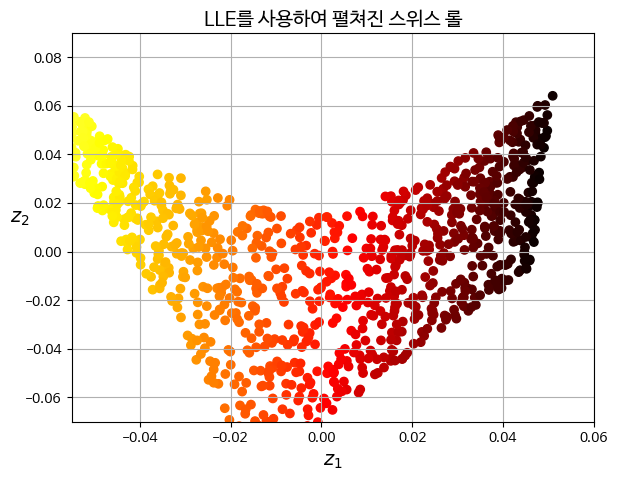

In [117]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-10ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1],
            c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.axis([-0.055, 0.060, -0.070, 0.090])
plt.grid(True)

save_fig("lle_unrolling_plot")
plt.title("LLEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÌéºÏ≥êÏßÑ Ïä§ÏúÑÏä§ Î°§")
plt.show()

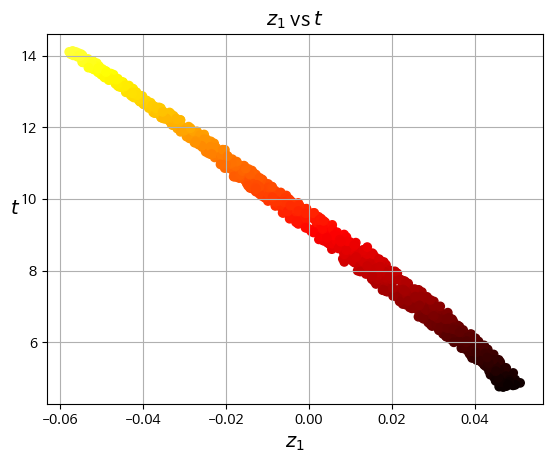

In [118]:
# Ï∂îÍ∞Ä ÏΩîÎìú - z1Ïù¥ tÏôÄ ÏñºÎßàÎÇò Ïûò Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÎäîÏßÄ Î≥¥Ïó¨Ï§çÎãàÎã§: LLEÍ∞Ä Ïûò ÏûëÎèôÌñàÏäµÎãàÎã§.
plt.title("$z_1$ vs $t$")
plt.scatter(X_unrolled[:, 0], t, c=t, cmap=darker_hot)
plt.xlabel("$z_1$")
plt.ylabel("$t$", rotation=0)
plt.grid(True)
plt.show()

In [119]:
from sklearn.manifold import MDS

# ÏÇ¨Ïù¥ÌÇ∑Îü∞ 1.4Î≤ÑÏ†ÑÏóêÏÑú normalized_stress Îß§Í∞úÎ≥ÄÏàòÏùò Í∏∞Î≥∏Í∞íÏù¥ FalseÏóêÏÑú "auto"Î°ú Î≥ÄÍ≤ΩÎê©ÎãàÎã§.
# ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º Ïú†ÏßÄÌïòÎèÑÎ°ù Î™ÖÏãúÏ†ÅÏúºÎ°ú FalseÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
mds = MDS(n_components=2, normalized_stress=False, random_state=42)
X_reduced_mds = mds.fit_transform(X_swiss)

In [120]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_swiss)

In [121]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
X_reduced_tsne = tsne.fit_transform(X_swiss)

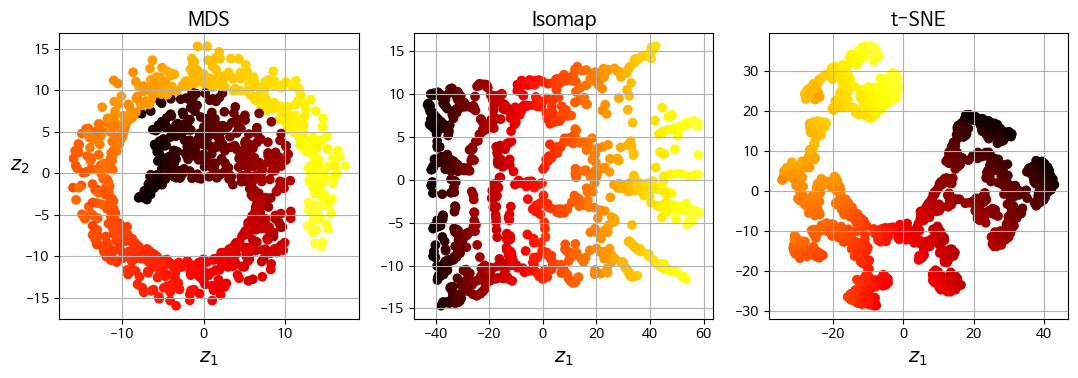

In [122]:
# Ï∂îÍ∞Ä ÏΩîÎìú - Ïù¥ ÏÖÄÏùÄ Í∑∏Î¶º 8-11ÏùÑ ÏÉùÏÑ±ÌïòÍ≥† Ï†ÄÏû•Ìï©ÎãàÎã§.

titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11, 4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()

# Ï∂îÍ∞Ä ÏûêÎ£å ‚Äì Kernel PCA

In [123]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04, random_state=42)
X_reduced = rbf_pca.fit_transform(X_swiss)

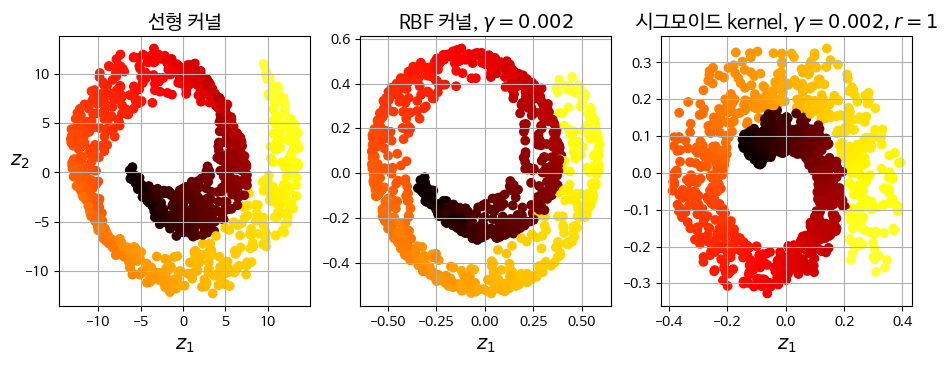

In [124]:
lin_pca = KernelPCA(kernel="linear")
rbf_pca = KernelPCA(kernel="rbf", gamma=0.002)
sig_pca = KernelPCA(kernel="sigmoid", gamma=0.002, coef0=1)

kernel_pcas = ((lin_pca, "ÏÑ†Ìòï Ïª§ÎÑê"),
               (rbf_pca, rf"RBF Ïª§ÎÑê, $\gamma={rbf_pca.gamma}$"),
               (sig_pca, rf"ÏãúÍ∑∏Î™®Ïù¥Îìú kernel, $\gamma={sig_pca.gamma}, r={sig_pca.coef0}$"))

plt.figure(figsize=(11, 3.5))
for idx, (kpca, title) in enumerate(kernel_pcas):
    kpca.n_components = 2
    kpca.random_state = 42
    X_reduced = kpca.fit_transform(X_swiss)

    plt.subplot(1, 3, idx + 1)
    plt.title(title)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=darker_hot)
    plt.xlabel("$z_1$")
    if idx == 0:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid()

plt.show()

# Ïó∞ÏäµÎ¨∏Ï†ú Ìï¥Îãµ

## 1. to 8.

Î∂ÄÎ°ù A Ï∞∏Ï°∞

## 9.

Î¨∏Ï†ú: _(3Ïû•ÏóêÏÑú ÏÜåÍ∞úÌïú) MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î°úÎìúÌïòÍ≥† ÌõàÎ†® ÏÑ∏Ìä∏ÏôÄ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú Î∂ÑÌï†Ìï©ÎãàÎã§(Ï≤òÏùå 60,000Í∞úÎäî ÌõàÎ†®ÏùÑ ÏúÑÌïú ÏÉòÌîåÏù¥Í≥† ÎÇòÎ®∏ÏßÄ 10,000Í∞úÎäî ÌÖåÏä§Ìä∏Ïö©ÏûÖÎãàÎã§)._

MNIST Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Îäî Ïù¥Ï†ÑÏóê Î°úÎìúÎêòÏóàÏäµÎãàÎã§.

In [ ]:
X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

Î¨∏Ï†ú: _Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ§Í≥† ÏñºÎßàÎÇò Ïò§Îûò Í±∏Î¶¨ÎäîÏßÄ ÏãúÍ∞ÑÏùÑ Ïû∞ Îã§Ïùå, ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Î°ú ÎßåÎì§Ïñ¥ÏßÑ Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§._

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
%time rnd_clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Î¨∏Ï†ú: _Í∑∏Îü∞ Îã§Ïùå PCAÎ•º ÏÇ¨Ïö©Ìï¥ ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞Ïù¥ 95%Í∞Ä ÎêòÎèÑÎ°ù Ï∞®ÏõêÏùÑ Ï∂ïÏÜåÌï©ÎãàÎã§._

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

Î¨∏Ï†ú: _Ïù¥ Ï∂ïÏÜåÎêú Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÏÉàÎ°úÏö¥ ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞Î•º ÌõàÎ†®ÏãúÌÇ§Í≥† ÏñºÎßàÎÇò Ïò§Îûò Í±∏Î¶¨ÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§. ÌõàÎ†® ÏÜçÎèÑÍ∞Ä Îçî Îπ®ÎùºÏ°åÎÇòÏöî?_

In [ ]:
rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
%time rnd_clf_with_pca.fit(X_train_reduced, y_train)

ÌõàÎ†®Ïù¥ Ïã§Ï†úÎ°ú Îëê Î∞∞ Ï†ïÎèÑ ÎäêÎ†§Ï°åÏäµÎãàÎã§! Ïñ¥ÎñªÍ≤å Í∑∏Îü¥ Ïàò ÏûàÏùÑÍπåÏöî? Ïù¥ Ïû•ÏóêÏÑú ÏÇ¥Ìé¥Î≥∏ Í≤ÉÏ≤òÎüº Ï∞®Ïõê Ï∂ïÏÜåÍ∞Ä Ìï≠ÏÉÅ ÌõàÎ†® ÏãúÍ∞Ñ Îã®Ï∂ïÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäî Í≤ÉÏùÄ ÏïÑÎãàÎ©∞ Îç∞Ïù¥ÌÑ∞ÏÖã, Î™®Îç∏ Î∞è ÌõàÎ†® ÏïåÍ≥†Î¶¨Ï¶òÏóê Îî∞Îùº Îã¨ÎùºÏßëÎãàÎã§. Í∑∏Î¶º 8-6(ÏúÑÏùò `manifold_decision_boundary_plot*` ÌîåÎ°Ø)ÏùÑ Ï∞∏Ï°∞ÌïòÏÑ∏Ïöî. `RandomForestClassifier` ÎåÄÏã† `SGDClassifier`Î•º ÏÇ¨Ïö©Ìï¥ Î≥¥Î©¥, PCAÎ•º ÏÇ¨Ïö©Ìï† Îïå ÌõàÎ†® ÏãúÍ∞ÑÏù¥ 3Î∞∞ Ï†ïÎèÑ Îã®Ï∂ïÎêòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§. ÏÇ¨Ïã§ Ïù¥ ÏûëÏóÖÏùÄ Ïû†Ïãú ÌõÑÏóê ÌïòÍ≤†ÏßÄÎßå, Î®ºÏ†Ä ÏÉàÎ°úÏö¥ ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î∂ÑÎ•òÍ∏∞Ïùò Ï†ïÎ∞ÄÎèÑÎ•º ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

Î¨∏Ï†ú: _Ïù¥Ï†ú ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú Ïù¥ Î∂ÑÎ•òÍ∏∞Î•º ÌèâÍ∞ÄÌï¥Î≥¥ÏÑ∏Ïöî. Ïù¥Ï†Ñ Î∂ÑÎ•òÍ∏∞ÏôÄ ÎπÑÍµêÌï¥ÏÑú Ïñ¥Îñ§Í∞ÄÏöî?_

In [ ]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

Ï∞®ÏõêÏùÑ Ï§ÑÏùº Îïå Ïû†Ïû¨Ï†ÅÏúºÎ°ú Ïú†Ïö©Ìïú Ïã†Ìò∏Í∞Ä ÏùºÎ∂Ä ÏÜêÏã§ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê ÏÑ±Îä•Ïù¥ ÏïΩÍ∞Ñ Ï†ÄÌïòÎêòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†ÅÏûÖÎãàÎã§. Í∑∏Îü¨ÎÇò Ïù¥ Í≤ΩÏö∞ÏóêÎäî ÏÑ±Îä• Ï†ÄÌïòÍ∞Ä Îã§ÏÜå Ïã¨Í∞ÅÌï©ÎãàÎã§. Îî∞ÎùºÏÑú PCAÎäî ÌïôÏäµ ÏÜçÎèÑÎ•º Îä¶Ï∂îÍ≥† ÏÑ±Îä•ÏùÑ Ï†ÄÌïòÏãúÌÇ§Îäî Îì± Ïã§Ï†úÎ°ú ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§. üò≠

Î¨∏Ï†ú: _`SGDClassifier`Î°ú Îã§Ïãú ÏãúÎèÑÌï¥ Î≥¥ÏÑ∏Ïöî. PCAÍ∞Ä ÏñºÎßàÎÇò ÎèÑÏõÄÏù¥ ÎêòÎÇòÏöî?_

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

In [ ]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

Ï¢ãÏïÑ, `SGDClassifier`Îäî Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú `RandomForestClassifier`Î≥¥Îã§ ÌõàÎ†®ÌïòÎäî Îç∞ Ìõ®Ïî¨ Îçî Ïò§Îûò Í±∏Î¶¨Í≥† ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú ÏÑ±Îä•Ïù¥ Îçî ÎÇòÏÅ©ÎãàÎã§. ÌïòÏßÄÎßå ÏßÄÍ∏à Ïö∞Î¶¨Í∞Ä Í¥ÄÏã¨ ÏûàÎäî Í≤ÉÏùÄ Í∑∏Îü∞ Í≤ÉÏù¥ ÏïÑÎãàÎùº PCAÍ∞Ä `SGDClassifier`Ïóê ÏñºÎßàÎÇò ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÎäîÏßÄ Î≥¥Í≥† Ïã∂ÏäµÎãàÎã§. Ï∂ïÏÜåÎêú Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÌõàÎ†®Ìï¥ Î¥ÖÏãúÎã§:

In [ ]:
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

Î©ãÏßÄÎÑ§Ïöî! Ï∞®ÏõêÏùÑ Ï§ÑÏù¥Î©¥ ÏÜçÎèÑÍ∞Ä ÏïΩ 5Î∞∞ Îπ®ÎùºÏ°åÏäµÎãàÎã§. :)  Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÎ•º ÌôïÏù∏Ìï¥ Î¥ÖÏãúÎã§:

In [ ]:
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

ÌõåÎ•≠Ìï©ÎãàÎã§! PCAÎäî ÏÜçÎèÑÎ•º 5Î∞∞ Ìñ•ÏÉÅÏãúÏº∞ÏùÑ ÎøêÎßå ÏïÑÎãàÎùº ÏÑ±Îä•ÎèÑ ÏïΩÍ∞Ñ Í∞úÏÑ†ÌñàÏäµÎãàÎã§.

Ïó¨Í∏∞ÍπåÏßÄÏûÖÎãàÎã§: PCAÎäî ÏóÑÏ≤≠ÎÇú ÏÜçÎèÑ Ìñ•ÏÉÅÍ≥º Ïö¥Ïù¥ Ï¢ãÏúºÎ©¥ ÏÑ±Îä• Ìñ•ÏÉÅÏùÑ Í∞ÄÏ†∏Ïò¨ Ïàò ÏûàÏäµÎãàÎã§.... ÌïòÏßÄÎßå Î≥¥Ïû•ÎêòÏßÄÎäî ÏïäÏäµÎãàÎã§. Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞ ÏÑ∏Ìä∏Ïóê Îî∞Îùº Îã§Î¶ÖÎãàÎã§!

## 10.

Î¨∏Ï†ú: _t-SNE ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏÇ¨Ïö©Ìï¥ MNIST Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Ï≤òÏùå 5,000Í∞ú Ïù¥ÎØ∏ÏßÄÎ•º 2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜåÏãúÌÇ§Í≥† Îß∑ÌîåÎ°ØÎ¶ΩÏúºÎ°ú Í∑∏ÎûòÌîÑÎ•º Í∑∏Î†§Î≥¥ÏÑ∏Ïöî. Ïù¥ÎØ∏ÏßÄÏùò ÌÉÄÍπÉ ÌÅ¥ÎûòÏä§ÎßàÎã§ 10Í∞ÄÏßÄ ÏÉâÏÉÅÏúºÎ°ú ÎÇòÌÉÄÎÇ∏ ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î¶¥ Ïàò ÏûàÏäµÎãàÎã§._

ÏûëÏóÖ ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌï¥ MNIST ÌõàÎ†® ÏÑ∏Ìä∏Ïùò Ï≤´ 5,000Í∞ú Ïù¥ÎØ∏ÏßÄÎ°ú Ï†úÌïúÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [ ]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

Îç∞Ïù¥ÌÑ∞ ÏßëÌï©ÏùÑ Í∑∏ÎûòÌîÑÎ°ú Í∑∏Î¶¥ Ïàò ÏûàÎèÑÎ°ù t-SNEÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Ï∞®ÏõêÏùÑ 2DÎ°ú Ï§ÑÏó¨ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
%time X_reduced = tsne.fit_transform(X_sample)

Ïù¥Ï†ú MatplotlibÏùò `scatter()` Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å Ïà´ÏûêÏóê ÎåÄÌï¥ Îã§Î•∏ ÏÉâÏÉÅÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î†§ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

Ï†ïÎßê ÏïÑÎ¶ÑÎãµÏßÄ ÏïäÎÇòÏöî? :) t-SNEÏóê ÌÉÄÍπÉÏù¥ Ï£ºÏñ¥ÏßÄÏßÄ ÏïäÏïòÏùåÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† ÎåÄÎ∂ÄÎ∂ÑÏùò Ïà´ÏûêÍ∞Ä Îã§Î•∏ Ïà´ÏûêÏôÄ Ïûò Î∂ÑÎ¶¨ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Ïú†ÏÇ¨Ìïú Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÏãùÎ≥ÑÌñàÏäµÎãàÎã§. ÌïòÏßÄÎßå Ïó¨Ï†ÑÌûà ÏïΩÍ∞Ñ Í≤πÏπòÎäî Î∂ÄÎ∂ÑÏù¥ ÏûàÏäµÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, 3Í≥º 5Í∞Ä ÎßéÏù¥ Í≤πÏπòÍ≥†(Í∑∏ÎûòÌîÑÏùò Ïò§Î•∏Ï™Ω) 4ÏôÄ 9ÎèÑ Í≤πÏπ©ÎãàÎã§(Ïò§Î•∏Ï™Ω ÏÉÅÎã® Î™®ÏÑúÎ¶¨).

Ïà´Ïûê 4ÏôÄ 9ÏóêÎßå ÏßëÏ§ëÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

Ïù¥ Îëê Í∞úÏùò Ïà´ÏûêÎßåÏúºÎ°ú t-SNEÎ•º Ïã§ÌñâÌïòÏó¨ Îçî Î©ãÏßÑ Ïù¥ÎØ∏ÏßÄÎ•º ÎßåÎì§ Ïàò ÏûàÎäîÏßÄ ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
idx = (y_sample == '4') | (y_sample == '9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

In [ ]:
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

Ïó¨Ï†ÑÌûà ÏïΩÍ∞Ñ Í≤πÏπòÍ∏∞Îäî ÌïòÏßÄÎßå Ìõ®Ïî¨ ÎÇòÏïÑÏ°åÏäµÎãàÎã§. 4Í∞Ä 9Ï≤òÎüº Î≥¥Ïù¥Í±∞ÎÇò Í∑∏ Î∞òÎåÄÏùò Í≤ΩÏö∞ÎèÑ ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Ïù¥ Í∑∏ÎûòÌîÑÏùò Í∞Å ÏòÅÏó≠ÏóêÏÑú Î™á Í∞úÏùò Ïà´ÏûêÎ•º ÏãúÍ∞ÅÌôîÌïòÏó¨ Î¨¥Ïä® ÏùºÏù¥ ÏùºÏñ¥ÎÇòÍ≥† ÏûàÎäîÏßÄ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎã§Î©¥ Ï¢ãÏùÑ Í≤ÉÏûÖÎãàÎã§. Ïã§Ï†úÎ°ú ÏßÄÍ∏à Í∑∏Î†áÍ≤å Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

Î¨∏Ï†ú: _ÎòêÎäî ÏÇ∞Ï†êÎèÑÏùò Í∞Å Ìè¨Ïù∏Ìä∏Î•º Ïù¥Ïóê ÏÉÅÏùëÌïòÎäî ÏÉòÌîåÏùò ÌÅ¥ÎûòÏä§(0ÏóêÏÑú 9ÍπåÏßÄ Ïà´Ïûê)Î°ú Î∞îÍæ∏Í±∞ÎÇò Ïà´Ïûê Ïù¥ÎØ∏ÏßÄ ÏûêÏ≤¥Ïùò ÌÅ¨Í∏∞Î•º Ï§ÑÏó¨ÏÑú Í∑∏Î¶¥ ÏàòÎèÑ ÏûàÏäµÎãàÎã§(Î™®Îì† Ïà´ÏûêÎ•º Îã§ Í∑∏Î¶¨Î©¥ Í∑∏ÎûòÌîÑÍ∞Ä ÎÑàÎ¨¥ Î≥µÏû°Ìï¥ÏßÄÎØÄÎ°ú Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌïú ÏÉòÌîåÎßå Í∑∏Î¶¨Í±∞ÎÇò, Ïù∏Ï†ëÌïú Í≥≥Ïóê Îã§Î•∏ ÏÉòÌîåÏù¥ Í∑∏Î†§Ï†∏ ÏûàÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ÏóêÎßå Í∑∏Î¶ΩÎãàÎã§). Ïûò Î∂ÑÎ¶¨Îêú Ïà´ÏûêÏùò Íµ∞ÏßëÏùÑ ÏãúÍ∞ÅÌôîÌï† Ïàò ÏûàÏùÑ Í≤ÉÏûÖÎãàÎã§._

(ÏúÑÏùò ÏÇ∞Ï†êÎèÑÏôÄ Ïú†ÏÇ¨Ìïú) ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î¶¨Í≥† ÏµúÏÜåÌïúÏùò Í±∞Î¶¨Î•º ÎùÑÍ≥† Ïó¨Îü¨ ÏÉâÍπîÎ°ú Ïà´ÏûêÎ•º Ïì∞Îäî `plot_digits()` Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§. Ïà´Ïûê Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†úÍ≥µÎêòÎ©¥ Í∑∏ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎåÄÏã† Í∑∏Î†§ÏßëÎãàÎã§. Ïù¥ Íµ¨ÌòÑÏùÄ ÏÇ¨Ïù¥ÌÇ∑Îü∞Ïùò ÌõåÎ•≠Ìïú ÏòàÏ†ú Ï§ë ÌïòÎÇò(Îã§Î•∏ Ïà´Ïûê Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏÇ¨Ïö©Ìïú [plot_lle_digits](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html))ÏóêÏÑú ÏòÅÍ∞êÏùÑ ÏñªÏóàÏäµÎãàÎã§.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # ÏûÖÎ†• ÌäπÏÑ±Ïùò Ïä§ÏºÄÏùºÏùÑ 0ÏóêÏÑú 1ÍπåÏßÄÎ°ú Ï°∞Ï†ïÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
    X_normalized = MinMaxScaler().fit_transform(X)
    # Ïù¥Ï†ú ÏßÄÍ∏àÍπåÏßÄ Í∑∏Î¶∞ Ïà´ÏûêÏùò Ï¢åÌëú Î™©Î°ùÏùÑ ÎßåÎì≠ÎãàÎã§.
    # ÏïÑÎûò Î£®ÌîÑÏóêÏÑú `if` Î¨∏ÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ ÏãúÏûëÌï† Îïå Ïù¥ÎØ∏ Î©ÄÎ¶¨ Îñ®Ïñ¥Ï†∏ ÏûàÎäî Í≤ÉÏúºÎ°ú Í∞ÄÏ†ïÌï©ÎãàÎã§.
    neighbors = np.array([[10., 10.]])
    # ÎÇòÎ®∏ÏßÄÎäî ÏÑ§Î™ÖÏù¥ ÌïÑÏöî ÏóÜÏäµÎãàÎã§.
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # ÌòÑÏû¨ Ï∂ï Í∞ÄÏ†∏Ïò§Í∏∞
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)

ÌïúÎ≤à Ìï¥Î¥ÖÏãúÎã§! Î®ºÏ†Ä 5,000Í∞úÏùò Ïù¥ÎØ∏ÏßÄ Î™®ÎëêÏóê ÎåÄÌï¥ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏïÑÎãå Ïª¨Îü¨ Ïà´ÏûêÎ•º ÌëúÏãúÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
plot_digits(X_reduced, y_sample)

Í¥úÏ∞ÆÏßÄÎßå Í∑∏Î†áÍ≤å ÏïÑÎ¶ÑÎãµÏßÄÎäî ÏïäÏäµÎãàÎã§. Ïà´Ïûê Ïù¥ÎØ∏ÏßÄÎ°ú ÏãúÎèÑÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
plot_digits(X_reduced, y_sample, images=X_sample, figsize=(35, 25))

Îçî Î©ãÏßÄÎÑ§Ïöî! Ïù¥Ï†ú 4Í≥º 9ÏóêÎßå ÏßëÏ§ëÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))

ÎπÑÏä∑ÌïòÍ≤å ÏÉùÍ∏¥ 4Í∞Ä Ïñ¥ÎñªÍ≤å Í∑∏Î£πÌôîÎêòÏñ¥ ÏûàÎäîÏßÄ Î≥¥ÏÑ∏Ïöî. ÏòàÎ•º Îì§Ïñ¥, 4Îäî Í∑∏Î¶ºÏùò ÏÉÅÎã®Ïóê Í∞ÄÍπåÏõåÏßàÏàòÎ°ù Ï†êÏ†ê Îçî Í∏∞Ïö∏Ïñ¥ÏßëÎãàÎã§. Í∏∞Ïö∏Ïñ¥ÏßÑ 9ÎèÑ ÏÉÅÎã®Ïóê Í∞ÄÍπåÏõåÏßëÎãàÎã§. Ïñ¥Îñ§ 4Îäî Ïã§Ï†úÎ°ú 9Ï≤òÎüº Î≥¥Ïù¥Í∏∞ÎèÑ ÌïòÍ≥† Í∑∏ Î∞òÎåÄÏùò Í≤ΩÏö∞ÎèÑ ÏûàÏäµÎãàÎã§.

Î¨∏Ï†ú: _PCA, LLE, MDS Í∞ôÏùÄ Ï∞®Ïõê Ï∂ïÏÜå ÏïåÍ≥†Î¶¨Ï¶òÏùÑ Ï†ÅÏö©Ìï¥Î≥¥Í≥† ÏãúÍ∞ÅÌôî Í≤∞Í≥ºÎ•º ÎπÑÍµêÌï¥Î≥¥ÏÑ∏Ïöî._

PCAÎ∂ÄÌÑ∞ ÏãúÏûëÌïòÍ≤†ÏäµÎãàÎã§. ÏÜåÏöî ÏãúÍ∞ÑÎèÑ Ï∏°Ï†ïÌï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)
plt.show()

ÏôÄ, PCAÎäî Ï†ïÎßê Îπ†Î•¥ÎÑ§Ïöî! ÌïòÏßÄÎßå Î™á Í∞úÏùò ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Î≥¥Ïù¥ÏßÄÎßå Í≤πÏπòÎäî Î∂ÄÎ∂ÑÏù¥ ÎÑàÎ¨¥ ÎßéÏäµÎãàÎã§. LLEÎ•º ÏÇ¨Ïö©Ìï¥ Î¥ÖÏãúÎã§:

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)
plt.show()

ÏãúÍ∞ÑÏù¥ Îçî Í±∏Î¶¨ÏßÄÎßå Í≤∞Í≥ºÎäî Ï†ÑÌòÄ Ï¢ãÏßÄ ÏïäÏäµÎãàÎã§. Î∂ÑÏÇ∞ 95%Î•º Î≥¥Ï°¥ÌïòÎ©¥ÏÑú PCAÎ•º Î®ºÏ†Ä Ï†ÅÏö©ÌïòÎ©¥ Ïñ¥Îñ§ Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§ÎäîÏßÄ ÏÇ¥Ìé¥Î¥ÖÏãúÎã§:

In [ ]:
pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=2, random_state=42))

%time X_pca_lle_reduced = pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

Í≤∞Í≥ºÎäî Îã§ÏÜå ÎÇòÏÅòÏßÄÎßå Ïù¥Î≤à ÌõàÎ†®ÏùÄ Ï°∞Í∏à Îçî Îπ®ÎûêÏäµÎãàÎã§.

MDSÎ•º ÏÇ¨Ïö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

**Í≤ΩÍ≥†**, Îã§Ïùå ÏÖÄÏùÄ ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Ïã§ÌñâÌïòÎäî Îç∞ ÏïΩ 10~30Î∂ÑÏù¥ ÏÜåÏöîÎê©ÎãàÎã§:

In [ ]:
# ÏÇ¨Ïù¥ÌÇ∑Îü∞ 1.4Î≤ÑÏ†ÑÏóêÏÑú normalized_stress Îß§Í∞úÎ≥ÄÏàòÏùò Í∏∞Î≥∏Í∞íÏù¥ FalseÏóêÏÑú "auto"Î°ú Î≥ÄÍ≤ΩÎê©ÎãàÎã§.
# ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º Ïú†ÏßÄÌïòÎèÑÎ°ù Î™ÖÏãúÏ†ÅÏúºÎ°ú FalseÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
X_mds_reduced = MDS(n_components=2, normalized_stress=False,
                    random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()

Ïùå. Î™®Îì† ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä ÎÑàÎ¨¥ ÎßéÏù¥ Í≤πÏ≥êÏÑú Î≥¥Í∏∞ Ï¢ãÏßÄ ÏïäÏäµÎãàÎã§. PCAÎ°ú Î®ºÏ†Ä ÏãúÎèÑÌï¥ Î¥ÖÏãúÎã§. Îçî Îπ†Î•ºÍπåÏöî?

**Í≤ΩÍ≥†**, Îã§Ïùå ÏÖÄÏùÄ ÌïòÎìúÏõ®Ïñ¥Ïóê Îî∞Îùº Ïã§ÌñâÌïòÎäî Îç∞ ÏïΩ 10~30Î∂ÑÏù¥ ÏÜåÏöîÎê©ÎãàÎã§:

In [ ]:
# ÏÇ¨Ïù¥ÌÇ∑Îü∞ 1.4Î≤ÑÏ†ÑÏóêÏÑú normalized_stress Îß§Í∞úÎ≥ÄÏàòÏùò Í∏∞Î≥∏Í∞íÏù¥ FalseÏóêÏÑú "auto"Î°ú Î≥ÄÍ≤ΩÎê©ÎãàÎã§.
# ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º Ïú†ÏßÄÌïòÎèÑÎ°ù Î™ÖÏãúÏ†ÅÏúºÎ°ú FalseÎ°ú ÏßÄÏ†ïÌï©ÎãàÎã§.
pca_mds = make_pipeline(PCA(n_components=0.95, random_state=42),
                        MDS(n_components=2, normalized_stress=False, random_state=42))

%time X_pca_mds_reduced = pca_mds.fit_transform(X_sample)
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()

Í≤∞Í≥ºÎäî Í∞ôÍ≥† Îçî Îπ†Î•¥ÏßÄÎäî ÏïäÏäµÎãàÎã§: Ïù¥ Í≤ΩÏö∞ PCAÎäî ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÏïòÏäµÎãàÎã§.

Ïù¥Ï†ú LDAÎ•º ÏÇ¨Ïö©Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§:

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_sample, y_sample)
plot_digits(X_lda_reduced, y_sample, figsize=(12, 12))
plt.show()

Ïù¥ Î∞©Î≤ïÏùÄ Îß§Ïö∞ Îπ†Î•¥Î©∞ Ï≤òÏùåÏóêÎäî Ï¢ãÏïÑ Î≥¥Ïù¥ÏßÄÎßå Ïó¨Îü¨ ÌÅ¥Îü¨Ïä§ÌÑ∞Í∞Ä Ïã¨ÌïòÍ≤å Í≤πÏπúÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å Îê† ÎïåÍπåÏßÄÎäî Í∑∏Î†áÏßÄ ÏïäÏäµÎãàÎã§.

Ïù¥ ÏãúÌï©ÏóêÏÑú t-SNEÍ∞Ä Ïö∞ÏäπÌïú Í≤ÉÏùÄ Î∂ÑÎ™ÖÌïòÏßÄ ÏïäÎÇòÏöî?

Ïò§ÎäòÏùÄ Ïó¨Í∏∞ÍπåÏßÄÏûÖÎãàÎã§. Ïù¥ Ïû•Ïù¥ Ïû¨ÎØ∏ÏûàÏúºÏÖ®Í∏∞Î•º Î∞îÎûçÎãàÎã§!